# Проект по случайным процессам

## Гауссовская регрессия

### Выполнил Скорик Сергей Б05-875

## В чем состоит задача регрессии?

В реальной жизни при планировании чего-либо(например путешествия или даже похода в магазин) невозможно учесть все обстоятельства и особенности, которые позволят заранее продумать полную последовательность действий с наперед заданной точностью. Например, при походе в магазин мы не скажем с точностью до секунды в какое время мы в него придем, поскольку играют роль __случайные факторы__ такие как светофор очередь итп. Это заставляет нас действовать по ситуации: принимать решения на основе использования данных(нашего жизненного опыта) и их __статистической зависимости__. Так, мы не будем переходить дорогу, если увидим красный свет светофора, или оценим ситуацию на ней, если идем по пешеходному переходу. Такое поведение естественно для разумного существа. 

Таким образом, для построения гибких и адаптивных моделей часто требуется определить, как зависит наблюдаемая случайная величина от одной или нескольких других величин. __Задача регрессии__ -- это их некоторая _функциональная_ зависимость.

Дальнейшее изложение математической модели регрессии будет опираться на [лекции](https://tvims.nsu.ru/chernova/ms/lec/ms.html) [1]

## Математическая модель регрессии.

Проблема состоит в том, что в общем случае статистическая зависимость не обязана быть функциональной. Например
$$X = \xi + \eta \quad Z = \xi + \varphi $$
являются зависимыми случайными величинами, но эта зависимость не функциональная.

В этом случае предлагается рассмотреть условное математическое ожидание $X$ от $Z$. Такое рассмотрение по-прежнему отражает зависимость случайных величин, но является функциональной
$$\mathbb{E}\{X \mid Z = t\} = f(t)$$
Тогда функцию $f(t)$ называют _Линией регрессии $X$ на $Z$_, а уравнение $x = f(t)$ -- регрессионным уравнением.

Как найти функцию $f(t)$ на практике? Можно ли это сделать достоверно точно? Ответ на последний вопрос достаточно простой. Когда мы определяли функциональную зависимость между $X$ и $Z$ мы убрали случайность из $X$, заменив ее на математическое ожидание. В жизни же, конечно, такого не происходит. Мы наблюдаем случайную величину $X_i$ которая отличается от своего условного математического ожидания. Определим
$$\varepsilon_i = X_i - \mathbb{E}\{X_i \mid Z = t_i\} = X_i - f(t_i)$$
Это тоже случайная величина. Заметим, что
$$\mathbb{E}\{\varepsilon_i\} = \mathbb{E}\{X_i\} - f(t_i) = \mathbb{E}\{X_i \mid Z = t_i\} - \mathbb{E}\{X_i \mid Z = t_i\} = 0$$
Поэтому если про совместное распределение $\varepsilon_1, \ldots \varepsilon_n$ ничего не известно, то, например, предполагается, что $\overrightarrow{\varepsilon} \in \mathcal{N}(\overrightarrow{0}, \Sigma)$

Теперь можно ответить и на первый вопрос. Мы задаем или наблюдаем(в зависимости от процесса) случайную величину $Z$ и то, какие значения при этом принимает $X$. Пусть после $n$ экспериментов мы получили значения $ Z = \{t_1, \ldots , t_n\}$ и $X = \{X_1, \ldots, X_n\}$. По этим данным требуется как можно более точно оценить функцию $f(t)$. Если решать эту задачу в классе всех функций то ответ очевиден: $f(t)$ можно представить в виде ломанной, построенной по точкам $(t_i, X_i)$. Поэтому на класс функций накладывают дополнительные ограничения. Например $f(t)$ -- полином степени не выше $k$. Будем предполагать, что $f(t)$ полностью определяется неизвестными параметрами $\theta_1, \ldots, \theta_k$  

## Оценка максимального правдоподобия

Оценка маскимального правдоподобия состоит в том, что в качестве «наиболее правдоподобного» значения параметра берут значение $\theta$, максимизирующее вероятность получить при $n$ опытах данную выборку $X = (X_1, \ldots, X_n)$ Значение параметра $\theta$ зависит от выборки и является искомой оценкой. Формализуем понятие «вероятность получить данную выборку», чтобы впоследствии его максимизировать.

Для начала разберемся, что представляет из себя это значение $\theta$. На самом деле оно хорошо знакомо из курса теории вероятностей. Пусть случайная величина $X$ имеет распределение Пуассона. Требуется найти математическое ожидание этой случайной величины. Строго говоря, такая постановка задачи некорректна, поскольку распределение Пуассона в своем определении содержит параметр $\lambda$
$$\xi \sim Poisson(\lambda) \Leftrightarrow \mathbb{P}\{\xi = k\} = \dfrac{\lambda^k}{k!}e^{-\lambda}$$
Поэтому при такой постановке математическое ожидание $\mathbb{E}X$ неопределено. Таким образом, стоит подчеркнуть, что оно зависит от параметра $\theta = \lambda$ и обозначим его как $\mathbb{E}_{\theta}X$. Например, для распределения Бернулли $\theta = p$, для нормального распределения $\theta = (m, \sigma^2)$

Более того, если известно, что случайные величины $X_1, \ldots, X_n$ независимо одинаково распределены и известно их распределение $F_{\theta}$ для некоторого произвольного $\theta$, т.е. можно говорить об известной зависимости $F_{\theta}$ от $\theta$, то $\theta$ можно определить как неизвестный параметр, по которому восстанавливаются случайные величины. Такая постановка имеет смысл, поскольку обычно в проводимом эксперименте тип распределения известен заранее, требуется лишь указать значения параметров. Так, в широких предположениях рост юношей одного возраста имеет нормальное распределение (с неизвестными средним и дисперсией), а число покупателей в магазине в течение часа (не часа пик) — распределение Пуассона, и опять-таки с неизвестной «интенсивностью» $\lambda$

Определим 
$$\mathcal{F}_{\theta} = \{F_{\theta} \mid \theta \in \Theta \}$$
Такое множество будем называть $\textit{параметрическим семейством распределений}$. Здесь $\Theta$ -- множество допустимых $\theta$. Например для распределения пуассона $P_{\lambda}$
$$\mathcal{F}_{\theta} = P_{\lambda}, \quad \theta = \lambda, \quad \Theta = (0, \infty)$$
А для нормального распределения $\mathcal{N}_{m, \sigma^2}$
$$\mathcal{F}_{\theta} = \mathcal{N}_{m, \sigma^2}, \quad \theta = (m, \sigma^2), \quad \Theta = \mathbb{R} \times (0, \infty)$$

Теперь вернемся к «вероятности получить данную выборку». В зависимости от вида распределения $\mathcal{F}_{\theta}$ вероятность случайной величины принять значение $y$ определяется по разному. Так для абсолютно непрерывных распределений $\mathcal{F}_{\theta}$ это их плотность $f_{\theta}(y)$ с точностью до $dy$. Для дискретных это $\mathbb{P}_{\theta}\{X = y\}$. Объединим это одним $\textit{определением}$:

Функцию
$$f_{\theta}(y) = \begin{cases}
\text{плотность} f_{\theta}(y), & \text{если распределение}\: \mathcal{F}_{\theta}\: \text{абсолютно непрерывно} \\
\mathbb{P}_{\theta}\{X = y\}, & \text{если распределение}\: \mathcal{F}_{\theta}\: \text{дискретно} \\
\end{cases} $$
будем называть $\textit{плотностью}$ распределения $\mathcal{F}_{\theta}$

Тогда для выборки $X = (X_1, \ldots, X_n)$ можно определить функцию (случайная величина при фиксированном $\theta$)
$$f(X, \theta) = f_{\theta}(X_1) \cdot f_{\theta}(X_2) \cdot \ldots \cdot f_{\theta}(X_n) = \prod_{i=1}^n f_{\theta}(X_i)$$
которую называют $\textbf{функцией правдоподобия}$

Заметим, что для дискретного случая 
$$ f(\overrightarrow{x}, \theta) = \prod_{i=1}^n f_{\theta}(x_i) = \mathbb{P}(X_1 = x_1, \ldots , X_n = x_n) \quad \overrightarrow{x} = (x_1, \ldots , x_n)$$
Т.е. построенная функция правдоподобия как раз и описывает вероятность получить данную выборку. Таким образом $\textbf{оценкой максимального правдоподобия}$ будет значение $\overset{\circ}{\theta}$ при котором функция правдоподобия(при фиксированной выборке это есть просто функция от $\theta$) достигает максимума
$$\overset{\circ}{\theta} = \arg\max_{\theta} f(X, \theta)$$

Общая схема описания регрессии взята из [учебника](http://www.gaussianprocess.org/gpml/chapters/RW.pdf)[2]

Определения согласованы с [лекциями по случайным процессам](https://arxiv.org/pdf/1907.01060.pdf)[3]

## Гауссовская регрессия

Вернемся к математической модели регрессии. Как следует из названия проекта, на линию регрессии $f(t)$ накладывается ограничения Гауссовости: функция $f(t)$ должа быть стационарным Гауссовским процессом.(Здесь стационарность понимается в широком смысле)

$\textbf{Определение:}$ Случайный процесс $\{X(t), t \geqslant 0\}$ называется $\textit{гауссовским}$, если для любого $n \geqslant 1$ и точек $0 \leqslant t_1 < t_2 < \ldots < t_n$ вектор $\left( X(t_1), X(t_2), \ldots , X(t_n)\right)$ является нормальным случайным вектором 

$\textbf{Определение:}$  Случайный процесс $X(t) \in CL_2$ называется стационарным в широком смысле, если $m_X(t) = m_X = const$ и $R_X(t_1, t_2) = R_X(|t_1 - t_2|)$

Разберемся с тем как строится такая функция. Пусть дана выборка $\overrightarrow{X} = (\overrightarrow{x_1}, \ldots , \overrightarrow{x_n})^T \in \mathbb{R}^{n\times D}$ и $\overrightarrow{y} = (y_1, \ldots , y_n)^T$. Тогда значения $\overrightarrow{y}$ полагаем значениями Гауссовского процесса $f \sim \mathcal{GP}(0, R)$ (для простоты выкладок значения считаем незашумленными). В таком случае $\overrightarrow{y} \equiv \overrightarrow{f} = (f_1, \ldots , f_n)^T$  По определению гауссовского процесса это означает, что $\overrightarrow{f} \in \mathcal{N}(0, R)$, здесь 
$$R = \begin{pmatrix} 
R(x_1, x_1) & R(x_1, x_2) & \ldots & R(x_1, x_n) \\
R(x_2, x_1) & R(x_2, x_2) & \ldots & R(x_2, x_n) \\
\ldots & \ldots & \ldots & \ldots \\
R(x_n, x_1) & R(x_n, x_2) & \ldots & R(x_n, x_n) \\
\end{pmatrix} \overset{def}{=} R(X, X)$$
Требуется для признака $\overrightarrow{x_*} \in \mathbb{R}^D $ оценить неизвестное значение процесса $f_* \in \mathbb{R}$. Для Гауссовской регрессии оценка неизвестного значения производится через $\textbf{Байесовский вывод}$. Разберемся в чем он состоит.[[4]](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%B2%D1%8B%D0%B2%D0%BE%D0%B4) 

$\textbf{Байесовский вывод}$ -- это общий подход к оценке некоторого события(обычно говорят гипотезы) с учетом накопления о нем различных свидетельств. Действительно, если мы узнаем новые свидетельства, наша оценка вероятности гипотезы должна измениться. В основе такого метода лежит $\textit{теорема Байеса}:$
$$\mathbb{P}\{H | E\} = \dfrac{\mathbb{P}\{E | H\}\cdot \mathbb{P}\{H\}}{\mathbb{P}\{E\}}$$
Здесь 
<ul>
    <li>$H$ -- конкретная гипотеза</li>
    <li>$\mathbb{P}\{H\}$ -- $\textit{априорная вероятность}$ $H$, которая была получена до появления свидетельства $E$</li>
    <li>$\mathbb{P}\{E | H\}$ -- $\textit{условная вероятность}$ свидетельства $E$, если гипотеза $H$ оказывается верной. Если рассматривать ее как функцию $H$ при фиксированном $E$, можно заметить, что она является $\textbf{функцией правдоподобия}$</li>
    <li>$\mathbb{P}\{E\}$ -- $\textit{маргинальная вероятность}$ $E$. Она может быть вычислена по формуле $\textit{полной вероятности}$ для всех взаимоисключающих гипотез $H_i$ : $\mathbb{P}\{E\} = \sum\mathbb{P}\{E | H_i\}\mathbb{P}\{H_i\}$</li>
    <li>$\mathbb{P}\{H | E\}$ -- $\textit{апостериорная вероятность}$ $H$ для данного $E$ </li>
</ul>

Применительно к модели Гауссовской регрессии имеет смысл рассматривать априорное распределение вероятностей функций(поскольку Гауссовский процесс определяется только своей корреляционной функцией). Для плотности распределения Байесовский вывод примет вид
$$ p\left(f(x^*)\mid f_1, \ldots f_n\right) = \dfrac{p\left(f(x^*), f_1, \ldots f_n\right)}{p\left(f_1, \ldots f_n\right)}$$

### Распределение подвектора некоторого нормально распределенного вектора [[3]](https://arxiv.org/pdf/1907.01060.pdf)

Дальнейшим шагом стоит понимание того, как распределена случайная величина $f(x^*)$. 

Чтобы найти данную плотность распределения, рассмотрим в общем случае как будет выглядеть распределение подвектора некоторого нормально распределенного вектора: 

Пусть дан нормальный случайный вектор $X$ с $n$ компонентами. Пусть $X = (Y, Z)$, где $Y$ и $Z$ -- два подвектора вектора $X$ с $n_1$ и $n_2$ компонентами соответственно, причем $n_1 + n_2 = n$. Корреляционную матрицу вектора $X$ можно представить в виде
$$R = \begin{bmatrix}
R_{11} & R_{12} \\
R_{21} & R_{22} \\
\end{bmatrix}, $$
где $R_{11}$ -- кореляционная матрица вектора $Y$, $R_{22}$ -- корреляционная матрица вектора $Z$, а матрицы $R_{12}$ и $R_{21}$ -взаимные корреляционные матрицы векторов $Y$ и $Z$. Вектор $\mathbb{E}X = m$ также разбивается на 2 подвектора $\mathbb{E}Y = m_1$ и $\mathbb{E}Z = m_2$

Найдем условное распределение $Y$ при фиксированном $Z$. Без ограничения общности полагаем $R_{22}$ невырожденной(иначе размерность вектора можно понизить). 

Введем случайную величину
$$\hat Y = m_1 + R_{12}R_{22}^{-1}(Z - m_2)$$
Поскольку для любых матриц верны равенства 
$$tr(AB) = tr(BA),\;\; tr(ABC) = tr(ACB) = tr(BCA)$$
То, заметим, что
$$\mathbb{E}(Y - \hat Y)^\top(Z - m_2) = \mathbb{E}\left(Y - m_1 - R_{12}R_{22}^{-1}(Z - m_2)\right)^\top(Z - m_2) = tr(R_{12}) - tr(R_{12}R_{22}^{-1}R_{22}) = 0$$
Это означает, что компоненты вектора $Y - \hat Y$ и компоненты вектора $Z$ некоррелированны, а значит и независимы(свойство нормального вектора). 

Тогда
$$ Y = (Y - \hat Y) + \hat Y = (Y - \hat Y) + m_1 + R_{12}R_{22}^{-1}(Z - m_2)$$
где $(Y - \hat Y)$ не зависит от $Z$, а $\hat Y$, как следует из определения, при фиксированном $Z$ является константой. Значит условное распределение $Y$ при фиксированном $Z$ определяется нормальным законом с условным математическим ожиданием
$$\mathbb{E}(Y \mid Z) = \mathbb{E}(Y - \hat Y) + m_1 + R_{12}R_{22}^{-1}(Z - m_2) = m_1 + R_{12}R_{22}^{-1}(Z - m_2)$$
и условной корреляционной матрицей
$$\mathbb{E}\left((Y - \mathbb{E}(Y \mid Z))(Y - \mathbb{E}(Y \mid Z))^\top \mid Z \right) = \mathbb{E}(Y - \hat Y)(Y - \hat Y)^\top = \mathbb{E}(Y - m_1)(Y - m_1)^\top - R_{12}R_{22}^{-1}\mathbb{E}(Z - m_2)(Y - m_1)^\top - \mathbb{E}(Y - m_1)(Z - m_2)^\top R_{22}^{-1}R_{21} + R_{12}R_{22}^{-1}\mathbb{E}(Z - m_2)(Z - m_2)^\top R_{22}^{-1}R_{21} = R_{11} - R_{12}R_{22}^{-1}R_{21}$$

### В нашем случае 
$$ \begin{pmatrix}
f \\
f_* \\
\end{pmatrix} \sim \mathcal{N}\left(0, \begin{bmatrix}
R(X, X) & R(X, X_*) \\
R(X_*, X) & R(X_*, X_*) \\
\end{bmatrix} \right) \Rightarrow f_* \sim \mathcal{N}(\mu, R_*)$$
Где 
$$\mu = R(X_*, X)[R(X,X)]^{-1}f, \quad R_* = R(X_*,X_*) - R(X_*,X)[R(X,X)]^{-1}R(X,X_*) \quad (1)$$

Таким образом, мы получили очень важное свойство Гауссовсковских процессов в машинном обучении -- он отражает неопределенность модели напрямую, чего не скажешь, например, о нейронных сетях или полиномиальных сплайнах. 

### Рассмотрим как это отражается на графике регрессии и получим некоторые свойства. 

(Код ниже [[5]](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html) используется для иллюстрации графика. На деталях обучения модели на данный момент внимание не концентрируем)

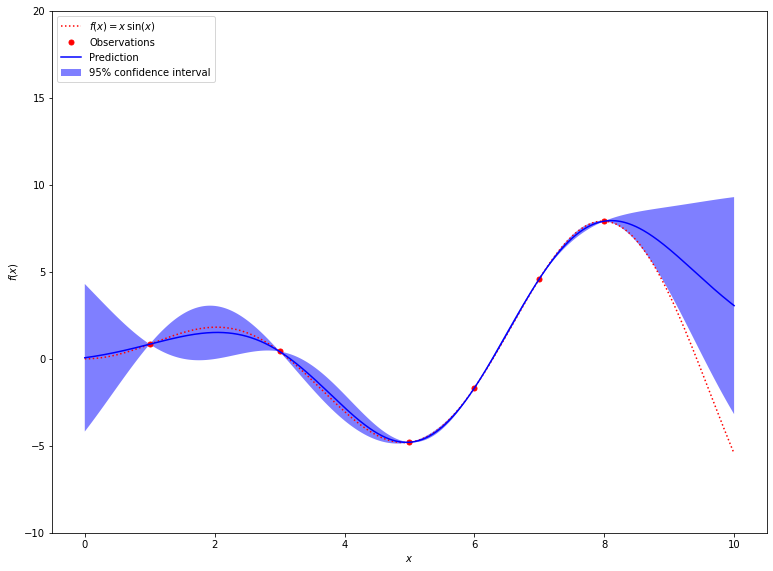

In [1]:
# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize = [12.8, 9.6])
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

На графике можно отметить следующие особенности: 

<ul>
    <li> При отдалении от обучающих примеров разброс стремится к постоянному значению, а среднее к нулю </li>
    <li> В точках обучающих примеров разброс равен нулю, а среднее значение равно значению в этих точках</li>    
</ul>

Действительно, это справедливо для всех графиков регрессий, полученных в ходе обучения гауссовским процессом. 

При $|x^* - x_j| \to \infty\: \forall j \: \Rightarrow R(x^* - x_j) \to 0 \Rightarrow R(X_*, X), R(X, X_*) \to 0 \Rightarrow R_* \to R(X_*, X_*) = const, \: \mu =  R(X_*, X)[R(X,X)]^{-1}f \to 0$ 

При $|x^* - x_1| \to 0 \Rightarrow R(X_*, X)[R(X,X)]^{-1} \to (1, 0, \ldots 0) \Rightarrow \mu \to f_1, \: R_* \to R(\overrightarrow{x_1}, \overrightarrow{x_1}) - (1, 0, \ldots 0) \cdot R(X, \overrightarrow{x_1}) = R(\overrightarrow{x_1}, \overrightarrow{x_1}) - R(\overrightarrow{x_1}, \overrightarrow{x_1}) = 0$
(Аналогично для других $x_j$)

### Адаптация модели под данные [[6]](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81)

Одна из главных особенностей гауссовских процессов заключается в том, что они полностью определяются своей ковариационной функцией(если математическое ожидание гауссовского процесса равно нулю). В частности, с помощью нее можно определять различные свойства гауссовских процессов. Например, выше мы вводили стационарность как $K_{X}(t_1, t_2) = K_{X}(|t_1 - t_2|)$. Для гауссовских процессов можно также определить свойство изотропности как независимость от направлений. Таким образом, ковариационная функция является $\textbf«ядром»$ процесса, определяющая его поведение.

Как уже было рассмотрено выше, суть гауссовской регрессии состоит в получении априорных распределений, которые, в соответствии с формулой $(1)$, зависят от ковариационной (а для нулевых средних и корреляционной) функции. В зависимости от предварительных знаниях о модели, мы можем настраивать $\textbf«ядро»$ таким образом, чтобы лучше описывать ее закономерности. Например, модель является гладкой (близким $x$ и $x^*$ соответствуют близкие $y$ и $y^*$)? Являются ли данные в модели разбросанными? Должна ли модель быть дифференцируемой? Эти знания можно использовать для адаптации ядра или, иначе говоря, адаптации модели под данные. 

$\textbf{Основные примеры распространненых ядровых функций}$
<ul>
    <li>Константа: $ K_{C}(x,x') = C$</li>
    <li>Линейная функция: $ K_{L}(x,x') =  x^T x'$ </li>
    <li>Гауссовский шум: $ K_{GN}(x,x') = \sigma^2 \delta_{x,x'}$</li>
    <li>Квадратичная экспоненциальная функция: $K_{SE}(x,x') = \exp \Big(-\frac{\|d\|^2}{2\ell^2} \Big)$ </li>
    <li>Функция Орнштейна — Уленбека: $K_{OU}(x,x') = \exp \left(-\frac{|d|} \ell \right)$ </li>
    <li>Matérn: $K_{Matern}(x,x') = \frac{2^{1-\nu}}{\Gamma(\nu)} \Big(\frac{\sqrt{2\nu}|d|}{\ell} \Big)^\nu K_\nu \Big(\frac{\sqrt{2\nu}|d|}{\ell} \Big)$ </li>    
    <li>Периодическая функция: $ K_{P}(x,x') = \exp\left(-\frac{ 2\sin^2\left(\frac d 2 \right)}{\ell^2} \right)$ </li>
    <li>Рациональная квадратичная функция: $K_{RQ}(x,x') =  (1+|d|^2)^{-\alpha}, \quad \alpha \geq 0$ </li>
</ul>
Здесь $d = x - x^*$, $l$ и $\sigma$ -- гиперпараметры, настраиваемые в процессе обучения. Первый является характеристикой масштаба процесса(насколько близко должны лежать $x$ и $x^*$, чтобы значительно влиять друг на друга), второй есть отклонений колебаний шума. $K_{\nu}$ -- модифицированная функция Бесселя, $\Gamma_{\nu}$ -- гамма-функция. 

### Важное свойство ядровых функций

В эспериментальной части мы будем пользоваться тем, что ядровые функции можно комбинировать. Это основано на следующих 2-х свойствах:

- Сумма ядровых функций -- ядровая функция:
$$k(x, x') = k_1(x, x') + k_2(x, x')$$
- Произведение ядровых функций -- ядровая функция:
$$k(x, x') = k_1(x, x') \cdot k_2(x, x')$$

__Доказательство:__[[7]](https://web.iitd.ac.in/~sumeet/CLT2008S-lecture18.pdf)

1. Первое свойство справедливо для любых ковариационных функций. Это следует из следующих рассуждений. 
$$\mathbb{D}\{\lambda \cdot X\} = \lambda \cdot K(X, X) \cdot \lambda^\top \quad \forall \lambda = (\lambda_1, \ldots, \lambda_n)^\top$$
Действительно
$$\mathbb{D}\{\lambda \cdot X\} = \mathbb{E}\left\{(\lambda(X - \mu)) \cdot (\lambda(X - \mu))^\top\right\} = \lambda \cdot \mathbb{E}\{(X - \mu) \cdot (X - \mu)^\top\} \cdot \lambda^\top = \lambda \cdot K(X, X) \cdot \lambda^\top$$
__Из этого сразу следуют 2 свойства матрицы K__

  1. Поскольку дисперсия для любой случайной величины неотрицательна, то для любого вектора $\lambda$ верно, что 
$$ 0 \leqslant \mathbb{D}\{\lambda X\} = \lambda K \lambda^\top$$
      Таким образом, ковариационная матрица должна быть неотрицательно-определенной
      
  2. Дисперсия -- это число (матрица $1 \times 1$). Поэтому при транспонировании она не меняется. Т.е.
$$ \lambda \cdot K \cdot \lambda^\top = \mathbb{D}\{\lambda \cdot X\} = (\mathbb{D}\{\lambda \cdot X\})^\top = (\lambda \cdot K \cdot \lambda^\top)^\top = \lambda \cdot K^\top \cdot \lambda^\top$$
     Поскольку равенство выполнено для любого $\lambda$, это означает, что матрица $K$ должна быть симметричной.

__Более того, верно и обратное:__ Любая неотрицательно-определенная и симметричная матрица будет ковариационной для некоторого случайного вектора $X$. Это можно показать явно, построив многомерную функцию плотности распределения для такой матрицы
$$ f(x_1, \ldots, x_n) \propto -\dfrac{1}{2}(x_1, \ldots , x_n)K^{-1}(x_1, \ldots , x_n)^\top$$ 
(Если матрица $K$ необратимая, то это лишь техническая деталь и для нее нужны некоторые оговорки)

Однако, если в результате суммы $k_1(x, x') + k_2(x, x')$ получится корелляционная матрица, которой соответствует *не гауссовский* случайный процесс. То такая функция не будет ядровой. Оказывается, верно и более строгое утверждение(см. Гасников, гл. 4, §3, теорема 4)

*Утверждение:* Класс неотрицательно определенных, комплекснозначных функций $\{R(t, s), t,s \in T\}$ совпадает с классом корелляционных функций комплекснозначных гауссовских процессов $\{X(t), t \in T\}$

Таким образом, достаточно проверить, что сумма $k_1(x, x') + k_2(x, x')$ будет неотрицательно-определенной

$$\forall \lambda \rightarrow \lambda(k_1 + k_2)\lambda^\top = \lambda k_1\lambda^\top + \lambda k_2\lambda^\top \geqslant 0 + 0 = 0$$

2. Как было отмечено выше, ядра $k_1(x, x')$ и $k_2(x, x')$ являются симметричными и неотрицательно-определенными. Тогда, по [теореме Мерсера](https://en.wikipedia.org/wiki/Mercer%27s_theorem)
$$k_1(x,y) = a(x)^\top a(y), \quad k_2(x, y) = b(x)^\top b(y)$$
Здесь $a(z) = [a_1(z), \ldots, a_M(z)]^\top$, $b(z) = [b_1(z), \ldots, b_N(z)]^\top$
Тогда 
$$k(x, y) = k_1(x,y) \cdot k_2(x, y) = \left(\sum_{m=1}^M a_m(x) a_m(y) \right) \left(\sum_{n=1}^N b_n(x) b_n(y) \right) \equiv \sum_{m=1}^M\sum_{n=1}^N c_{mn}(x) c_{mn}(y) $$
Поэтому $k(x, y)$ является неотрицательно-определенной, а значит и ядровой функцией некоторого случайного гауссовского процесса $X(t)$

### Иллюстрация гауссовских процессов, восстановленных по одним и тем же данным для различных ядер [[8]](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html)

C:\Users\skori\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\skori\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


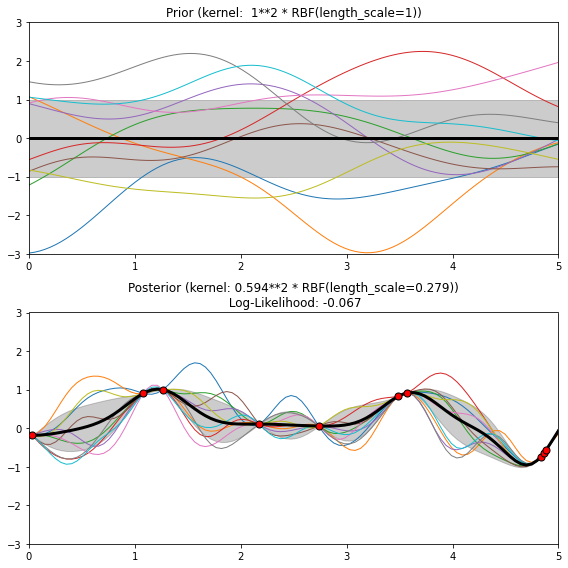

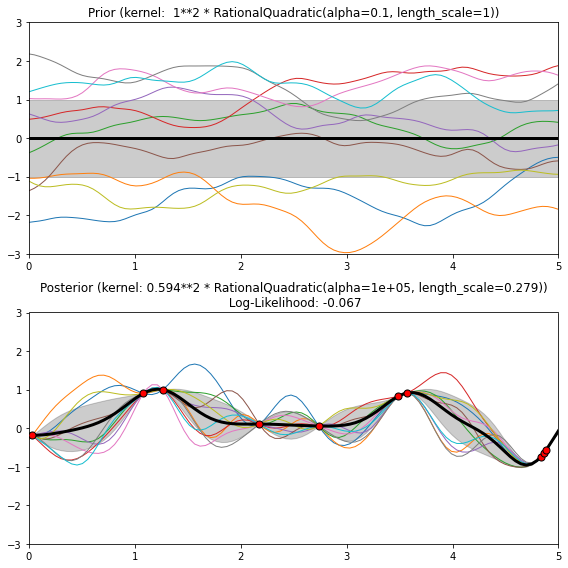

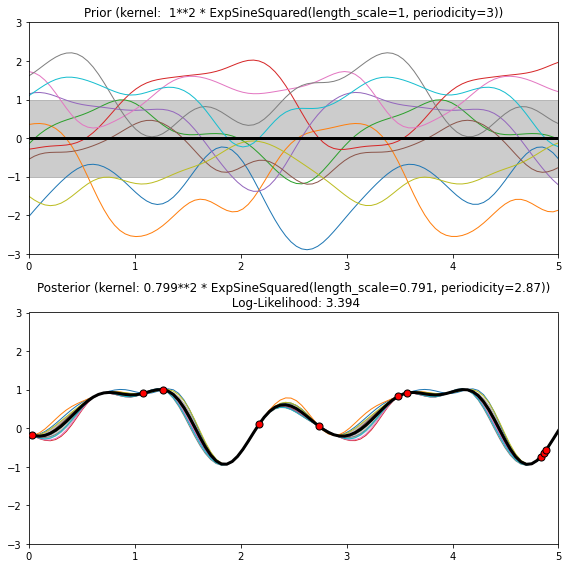

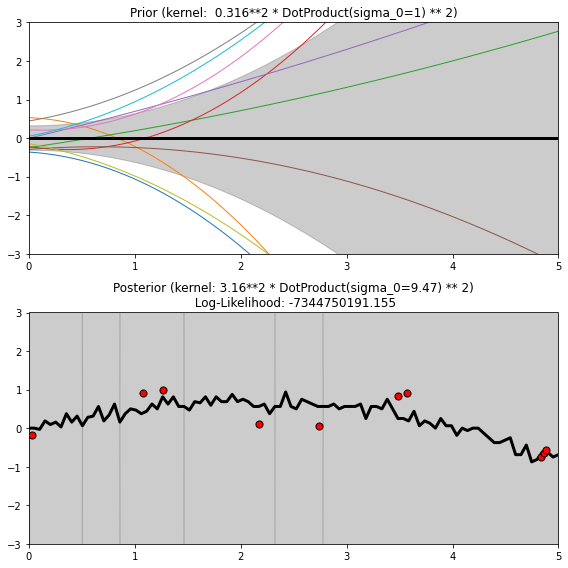

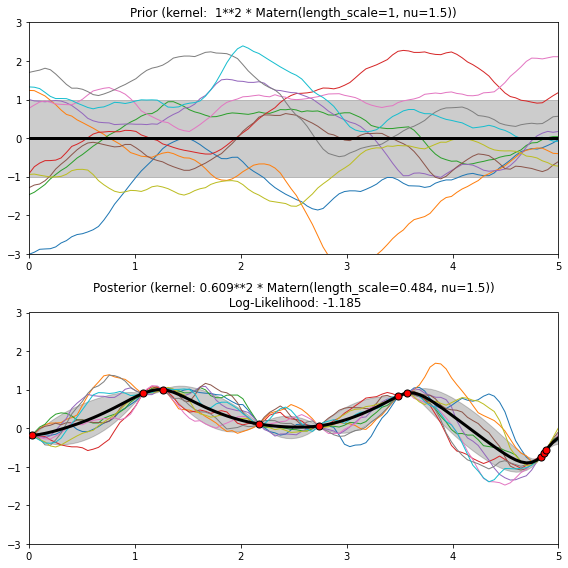

In [2]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

### Процесс обучения модели 

Обобщением всех сведений, изложенных в предыдущих пунктах, является интуитивное(но при этом не менее строгое) представление того, что и как необходимо обучать:

<ul>
    <li>За адаптацию модели отвечает ядро(корреляционная функция гауссовского процесса, которая при нулевом математическом ожидании полностью его определяет). Более того, у ядра есть настраиваемые параметры что еще раз подчеркивает, что обучать нужно именно его. </li>
    <li>Как было описано в математической модели регрессии, суть обучения модели -- максимизация функции правдоподобия, которая представлят собой плотность вероятности вектора $f = (f_1, f_2, \ldots, f_n)$ -- обучающей выборки. </li>
    <li>В самом начале определения гауссовской регрессии мы отметили, что на линию регрессии $g(t)$ накладывается ограничение: $g(t)$ должна представлять из себя гауссовский процесс. По определению это значит, что $f \in \mathcal{N}(\mu, K)$ -- нормальный случайный веткор, где $\mu$ - математической ожидание, а $K$ -- ковариационная функция. Более того, обсуждалось, что без ограничения общности мы можем полагать $\mu = 0$. Таким образом $f \in \mathcal{N}(0, K)$. Тогда функцией правдоподобия модели является плотность распределения случайного нормального вектора. Еще раз подчеркнем, что гауссовский процесс определяется ядром, который зависит от некоторых параметров. Таким образом, плотность распределения является функцией от них. По определению случайного нормального вектора его плотность распределения
$$p(f \mid \theta, x) = \dfrac{1}{(2\pi)^{\frac{n}{2}}(\det K)^{\frac{1}{2}}}e^{-\frac{1}{2}f^{\top }K^{-1}f} \quad \text{Функция правдоподобия} $$
В дальнейшем для краткости введем обозначение $\det K \overset{def}{=} |K|$. Наряду с обычной функцией правдоподобия, удобно также расматривать и логарифмическую. В нашем случае она равна
$$\log p(f \mid \theta, x) = -\dfrac{1}{2}f^{\top}K(\theta, x, x')^{-1}f - \dfrac{1}{2} \log |K(\theta, x, x')| - \dfrac{n}{2} \log 2\pi $$
Окончательно, процесс обучения модели основан на максимизации логарифмической функции правдоподобия
$$\log p(f \mid \theta, x) \rightarrow \max_{\theta} $$  </li>    
</ul>

Определение плотности распределения случайного нормального вектора можно взять, например, из [[9]](https://vk.com/doc192386009_568671108?hash=e473525acdefb436fa&dl=db23cb9754502e33bc) (см. пример 2)

### Дополнительная визуализация

В ходе поиска информации по гауссовской регрессии была найдена замечательная [презентация](http://cbl.eng.cam.ac.uk/pub/Public/Turner/News/imperial-gp-tutorial.pdf), которая иллюстрирует то, как можно визуально отобразить многомерное нормальное распределние в кривую регрессии(см. 22 - 144 слайды)

# Экспериментальная часть

В качестве экспериментальной части решим задачу регрессии для некоторой выборки с использованием библиотеки [GPyTorch](https://gpytorch.ai/)

Ее [документация](https://docs.gpytorch.ai/en/stable/)

Структура экспериментальной части была взята из [Deep|Bayes](http://deepbayes.ru/2019/)

In [3]:
import numpy as np
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline

### Синтетическая выборка

В качестве задачи регрессии возьмем моделирование функции 
$$y(x) = \sin(3\pi x) - \cos(\pi x) + \varepsilon \quad \varepsilon \in \mathcal{N}(0, 0.04), x \in [0, 1]$$
На обучающей выборке в 100 точек и 51 тестовой

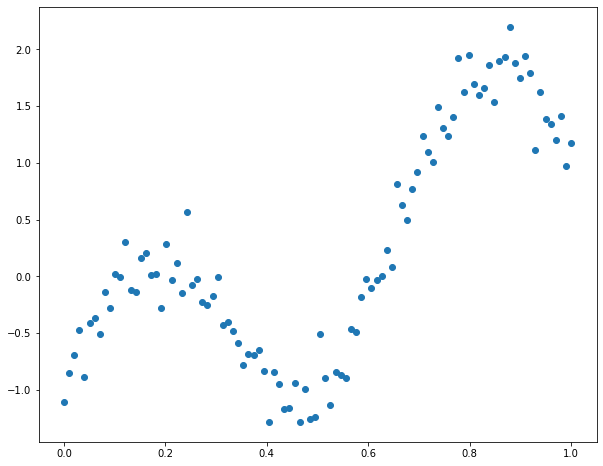

In [4]:
X_train = torch.linspace(0, 1, 100)
y_train = np.sin(3 * np.pi * X_train) - torch.cos(np.pi * X_train) + torch.randn(X_train.size()) * np.sqrt(0.04)

plt.figure(figsize=(10, 8))
plt.plot(X_train.numpy(), y_train.numpy(), 'o')

### Настройка модели

После инициализации тренировочных данных необходимо создать модель гауссовской регресии. Особенность библиотеки GPyTorch заключается в том, что модель нужно конструировать вручную с помощью предоставляемых инстурментов. По мнению создателей, это обеспечивает гибкость и удобство при работе со сложными моделями. 

Для большинства GPR(gaussian processes regression) моделей необходимо создать следующие GPyTorch объекты:
<ul>
    <li> Класс $\textbf{GP Model}$(gpytorch.models.ExactGP) -- отвечает за обработку данных </li>
    <li> $\textbf{Likelihood}$(gpytorch.likelihoods.GaussianLikelihood) -- функция правдоподобия  </li>
    <li> $\textbf{Mean}$ -- математическое ожидание гауссовского процесса </li>
    <li> $\textbf{Kernel}$ -- ядро(матрица ковариации) гауссовского процесса </li>
    <li> $\textbf{MultivariateNormal}$ Distribution(gpytorch.distributions.MultivariateNormal) -- объект для представления многомерных нормальных распределений </li>
</ul>

In [5]:
class GPRegressor(gpytorch.models.ExactGP):
    def __init__(self, X, y, kernel, likelihood=None):
        if likelihood is None:
            likelihood = gpytorch.likelihoods.GaussianLikelihood()
        super().__init__(X, y, likelihood)
        self.mean = gpytorch.means.ConstantMean()
        self.kernel = kernel
        self.likelihood = likelihood
        
    def forward(self, x):
        mean_x = self.mean(x)
        covar_x = self.kernel(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
    
    def predict(self, x):
        self.eval()
        with torch.no_grad():
            pred = self(x)
            return self.likelihood(pred)

Класс GPRegressor содержит стандартные для pytorch функции init и forward, которые, по словам разработчиков, обеспечивают бо́льшую гибкость модели. В целях удобства мы также добавим метод `predict`, о котором речь пойдет ниже. Также стандартным являются `.train()` и `.eval()` режимы, предназначенные соответственно для оптимизации гиперпараметров и вычисления вероятностей через апостериорную модель  

В качестве ядра возьмем наиболее распространенное -- квадратичная экспоненциальная функция(RBF), которое задается как
$$k(x,y) = \exp \Big(-\frac{\|x - y\|^2}{2\ell^2} \Big)$$
Его можно получить из модуля `kernels.RBFKernel`. Однако, как правило, ядро используют с коэффициентом масштаба $A$, т.е. 
$$k(x,y) = A\exp \Big(-\frac{\|x - y\|^2}{2\ell^2} \Big)$$
Чтобы его добавить, к ядру можно применить `kernels.ScaleKernel`. Таким образом, для получения ядра необходимо выполнить
```python
kernel = kernels.RBFKernel()
kernel = kernels.ScaleKernel(kernel)
```

In [6]:
kernel = gpytorch.kernels.RBFKernel()
kernel = gpytorch.kernels.ScaleKernel(kernel)
likelihood = gpytorch.likelihoods.GaussianLikelihood()

model = GPRegressor(X_train, y_train, kernel, likelihood)

### Обучение модели 

Обучение модели проходит аналогично машинному обучению в [PyTorch](https://pytorch.org/): 
- Создаем оптимизатор
- Создаем "loss"(в машинном обучении -- функция потерь, которую минимизируем. В нашем случае это правдоподобие, которое максимизируем)
- На каждой итерации обновляем градиенты оптимизатора, считаем loss, делаем обратный проход(backprop), делаем шаг оптимизатора

In [7]:
def train(model, X, y, n_epoch=100, lr=0.3, fix_noise_variance=None):
    # Find optimal model hyperparameters
    model.train()
    
    if fix_noise_variance is not None:
        model.likelihood.noise = fix_noise_variance
        training_parameters = [p for name, p in model.named_parameters()
                             if not name.startwith('likelihood')]
    else:
        training_parameters = model.parameters()
    
    # Use the adam optimizer
    optimizer = torch.optim.Adamax(training_parameters, lr=lr)
    
    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(model.likelihood, model)
    
    with gpytorch.settings.max_cholesky_size(0):
        for i in range(n_epoch):
            # Zero gradients from previous iteration
            optimizer.zero_grad()
            # Output from model
            output = model(X)
            # Calc loss and backprop gradients
            loss = -mll(output, y)
            loss.backward()

            optimizer.step()
            
            if i % 100 == 0 or i == (n_epoch - 1):
                print('Iter %d/%d - Loss: %.3f' % (
                    i + 1, n_epoch, loss.item(),))

In [8]:
train(model, X_train, y_train, n_epoch=50)

C:\Users\skori\anaconda3\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Iter 1/50 - Loss: 1.080
Iter 50/50 - Loss: -0.008


### Проверка модели

Заметим, что `GPRegressor.forward` возвращает многомерное нормальное распределение `MultivariateNormal` со своим средним, дисперсией и ковариацией. Таким образом, не нужно придумывать эвристики для оценки результатов -- это одна из особенностей GPR, отмеченных в теоретической части.

Для предсказаний же модели, полученное распределение необходимо пропустить через правдоподобие. Таким образом, надо переключится в режим оценки `.eval()`(для `model` и `lekelihood`) и пропустить тестовые данные. В целях избежания многократного повторения кода предсказание модели было реализовано как метод в классе `GPRegressor`

In [9]:
test_x = torch.linspace(0, 1, 51)
observed_pred = model.predict(test_x)

Полученная оценка, как следует из теории, имеет среднее и дисперсию. Для графика достаточно взять доверительную область, которая включает верхнюю и нижнюю оценку(содержится в методе `.confidence_region`), и среднее значение(`.mean`) 

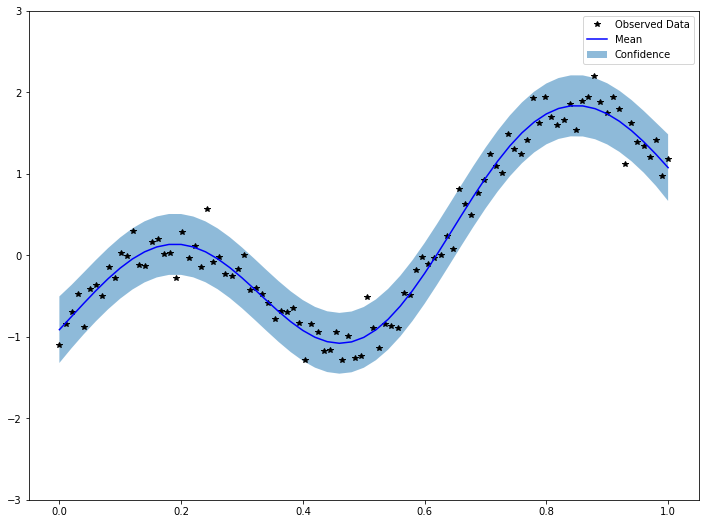

In [10]:
with torch.no_grad():
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(12, 9))

    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(X_train.numpy(), y_train.numpy(), 'k*')
    # Plot predictive means as blue line
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

### Вывод 

На примере синтетической выборки был показан процесс обучения модели гауссовской регрессии. Из него можно заключить, что основным шагом в обучении является подбор ядра. В этом случае с ним не было сложности, поскольку выборка была синтетической без каких-либо особенностей. Рассмотрим пример, где подбор ядра уже не столь очевиден, но прежде, поймем, почему выбор ядра может быть вообще неочевиден.  

### Комбинации ковариационных функций

Все дело в том, что ковариационные функции можно комбинировать. Это основано на 2-х следующих свойствах:

- Сумма ковариационных функций -- ковариационная функция:
$$k(x, x') = k_1(x, x') + k_2(x, x')$$
- Произведение ковариационных функций -- ковариационная функция:
$$k(x, x') = k_1(x, x') \cdot k_2(x, x')$$

Данные утверждения были обоснованы в теоретической части.

В `gpytorch` комбинации ковариационных функций получаются простыми операторами `+` и `*`

### Примеры комбинаций ковариационных функций

In [11]:
def plot_kernel(kernel, xlim=None, ax=None):
    if xlim is None:
        xlim = [-3, 5]
    x = torch.linspace(xlim[0], xlim[1], 100)
    with torch.no_grad():
        K = kernel(x, torch.ones((1))).evaluate().reshape(-1, 1)
        
    if ax is None:
        fig = plt.figure()
        ax = fig.add.subplot(111)
    ax.plot(x.numpy(), K.cpu().numpy())

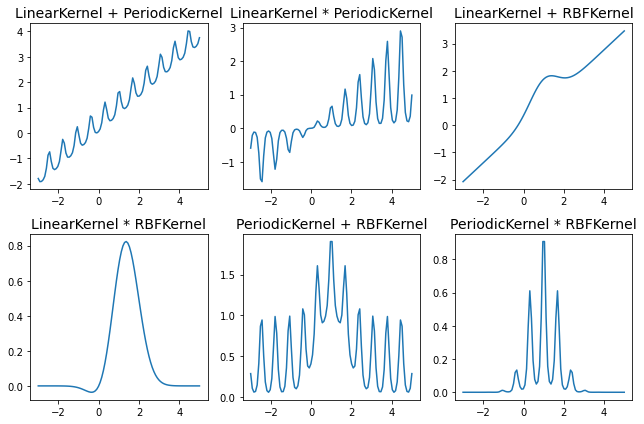

In [12]:
from gpytorch import kernels 

covariance_functions = [kernels.LinearKernel(power=1), kernels.PeriodicKernel(), 
                        kernels.RBFKernel()]

operations = {'+': lambda x, y: x + y, 
              '*': lambda x, y: x * y}

figure, axes = plt.subplots(len(operations), len(covariance_functions), figsize=(9, 6))

import itertools
axes = axes.ravel()
count = 0
for j, base_kernels in enumerate(itertools.combinations(covariance_functions, 2)):
    for k, (op_name, op) in enumerate(operations.items()):
        kernel = op(base_kernels[0], base_kernels[1])
        plot_kernel(kernel, ax = axes[count])
        kernel_names = [str(base_kernels[i]).split('(')[0] for i in [0, 1]]
        axes[count].set_title('{} {} {}'.format(kernel_names[0], op_name, kernel_names[1]), fontsize=14)
        
        count += 1
figure.tight_layout()

### Реальная выборка

В качестве примера рассмотрим выборку количества пассажиров в самолетах в зависимости от года(и месяца) полетов.  

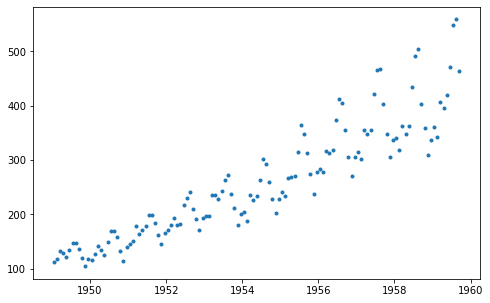

In [13]:
from scipy.io import loadmat

data = loadmat('airline.mat')

X = torch.tensor(data['X'])
y = torch.tensor(data['y'].astype(int)).squeeze()

plt.figure(figsize=(8, 5))
plt.plot(X.numpy(), y.numpy(), '.')

In [14]:
"""
Вспомогательная функция отрисовки 
предсказаний обученной модели
"""

def plot_model(model, X, y):
    
    x = torch.linspace(1948, 1964, 400).reshape(-1).double()
    observed_pred = model.predict(x)
    
    with torch.no_grad():
        # Initialize plot
        f, ax = plt.subplots(1, 1, figsize=(12, 9))

        # Get upper and lower confidence bounds
        lower, upper = observed_pred.confidence_region()
        # Plot training data as black stars
        ax.plot(X.numpy(), y.numpy(), 'k*')
        # Plot predictive means as blue line
        ax.plot(x.numpy(), observed_pred.mean.numpy(), 'b')
        # Shade between the lower and upper confidence bounds
        ax.fill_between(x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
        ax.set_ylim([80, 700])
        ax.legend(['Observed Data', 'Mean', 'Confidence'])

__Для данной выборки, аналогично синтетической, попробуем использовать RBF ядро__

In [15]:
k_rbf = kernels.ScaleKernel(kernels.RBFKernel())

Iter 1/500 - Loss: 4107.281
Iter 101/500 - Loss: 385.302
Iter 201/500 - Loss: 304.210
Iter 301/500 - Loss: 261.839
Iter 401/500 - Loss: 233.769
Iter 500/500 - Loss: 213.212
likelihood.noise_covar.raw_noise: 8.386
mean.constant: 11.824
kernel.raw_outputscale: 5.780
kernel.base_kernel.raw_lengthscale: 4.143


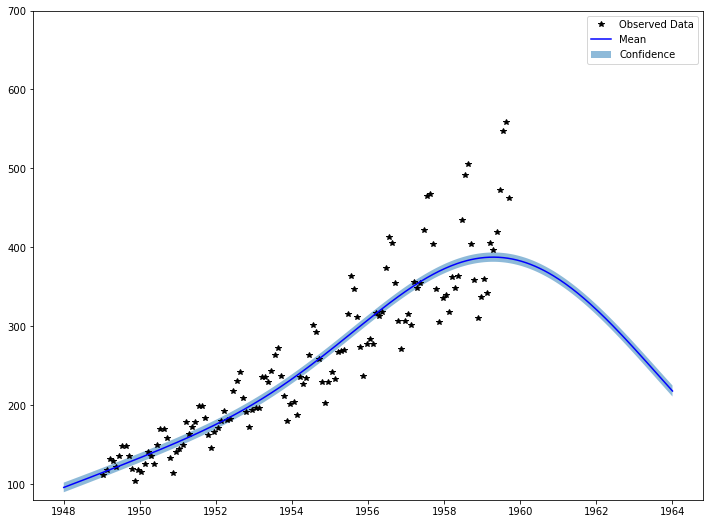

In [16]:
model = GPRegressor(X, y, k_rbf).double()
train(model, X, y, n_epoch = 500)

for name, p in model.named_hyperparameters():
    print(f"{name}: {p.item():.3f}")
    
plot_model(model, X, y)

Из графика предсказаний и значений loss-функции видно, что модель не смогла правильно обучиться на данных. Таким образом, в данной задаче стоит разобраться с тем, какую ковариационную функцию использовать. В нашем конкретном случае это можно сделать, если мы поймем, какую функцию на выходе мы хотим видеть. Для этого еще раз обратимся к зависимости наших данных 

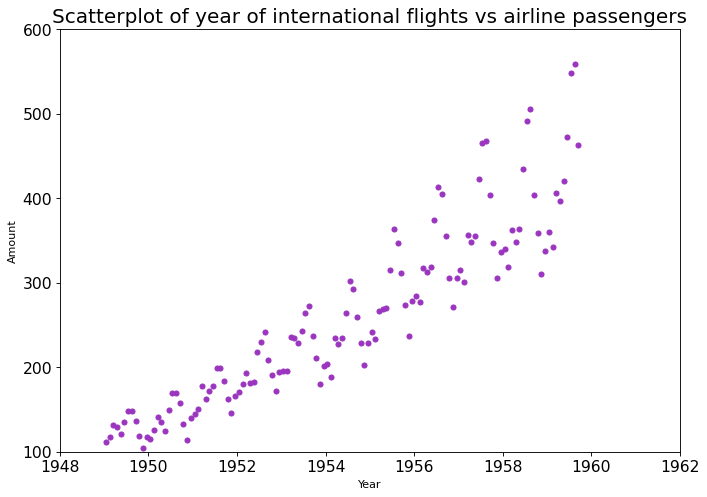

In [17]:
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(X.numpy(), y.numpy(), s=20, c='#9b35bf')

plt.gca().set(xlim=(1948, 1962), ylim=(100, 600),
              xlabel='Year', ylabel='Amount')

plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.title("Scatterplot of year of international flights vs airline passengers", fontsize=18)

plt.show()

__Из графика можно выделить следующие особенности:__

- У графика есть линейный рост
- Значения графика колебаются -- график является переодичным
- Более того, амплитуда колебаний увеличивается с ростом x 
- Как следствие, дисперсия предсказаний по мере увеличения года увеличивается 

Поэтому обученная модель должна обладать вышеперечисленными свойствами. График ее предсказаний должен выглядеть как то так: 
![title](Pic.png)

Поскольку за свойства модели отвечает ядро, то, в соответствии со сказанным(а также тем, что ядра можно комбинировать), его можно представить как

`kernel = k_trend + k_seasonal + k_noise`

Где `k_trend` отвечает за линейный рост, `k_seasonal` -- за периодичность, `k_noise` -- за зависимость дисперсии от x

Посмотрим как изменение ядра постепенно меняет вид линии регрессии. Для этого обучим модель последовательно сначала с одним, потом с двумя и наконец с тремя слагаемыми ядра `kernel`

__`kernel = k_trend`__

За линейный рост ядра отвечает класс `kernels.LinearKernel`

__Ремарка__: В каждое слагаемое будем добавлять RBF ядро. Это сделает линию регрессии более гладкой(как следствие, меньший loss)

In [18]:
k_trend = kernels.ScaleKernel(kernels.LinearKernel(power=1)) + kernels.ScaleKernel(kernels.RBFKernel())

Iter 1/1000 - Loss: 1544.012
Iter 101/1000 - Loss: 213.844
Iter 201/1000 - Loss: 171.534
Iter 301/1000 - Loss: 149.092
Iter 401/1000 - Loss: 134.101
Iter 501/1000 - Loss: 123.006
Iter 601/1000 - Loss: 114.097
Iter 701/1000 - Loss: 106.731
Iter 801/1000 - Loss: 100.530
Iter 901/1000 - Loss: 95.138
Iter 1000/1000 - Loss: 90.403
likelihood.noise_covar.raw_noise: 11.850
mean.constant: -33.958
kernel.kernels.0.raw_outputscale: -1.707
kernel.kernels.0.base_kernel.raw_variance: -1.707
kernel.kernels.1.raw_outputscale: 9.207
kernel.kernels.1.base_kernel.raw_lengthscale: 2.549


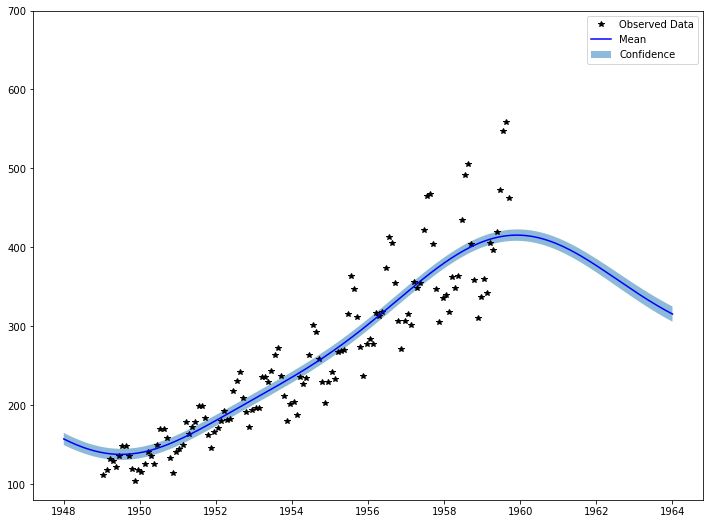

In [19]:
model = GPRegressor(X, y, k_trend).double()
train(model, X, y, n_epoch=1000)

for name, p in model.named_hyperparameters():
    print(f"{name}: {p.item():.3f}")
    
plot_model(model, X, y)

В первом случае отличия заметны по части loss-функции. На графике отличия видны не столь сильно. Это нормальный результат, поскольку что `LinearKernel`, что `RBFKernel` отвечают за линейный рост в выборке

__`kernel = k_trend + k_seasonal`__

Как было отмечено в свойствах графика, помимо периодичности необходимо учесть линейный рост амплитуды. За периодичность отвечает `kernels.PeriodicKernel()`. Тогда `k_seasonal = k_periodic * k_linear` (Также домножаем на RBF ядро для гладкости)

In [20]:
k_trend = (kernels.ScaleKernel(kernels.PolynomialKernel(power=1)) + 
          kernels.ScaleKernel(kernels.RBFKernel()))

k_seasonal = (kernels.ScaleKernel(kernels.PeriodicKernel()) * 
             kernels.LinearKernel() * 
             kernels.ScaleKernel(kernels.RBFKernel()))
        
kernel = kernels.AdditiveKernel(k_trend, k_seasonal)

Iter 1/1000 - Loss: 7.304
Iter 101/1000 - Loss: 4.857
Iter 201/1000 - Loss: 4.894
Iter 301/1000 - Loss: 4.925
Iter 401/1000 - Loss: 4.905
Iter 501/1000 - Loss: 4.866
Iter 601/1000 - Loss: 4.952
Iter 701/1000 - Loss: 4.872
Iter 801/1000 - Loss: 4.862
Iter 901/1000 - Loss: 4.919
Iter 1000/1000 - Loss: 4.865
likelihood.noise_covar.raw_noise: -3.033
mean.constant: 260.899
kernel.kernels.0.kernels.0.raw_outputscale: -10.584
kernel.kernels.0.kernels.0.base_kernel.raw_offset: -2.000
kernel.kernels.0.kernels.1.raw_outputscale: 233.567
kernel.kernels.0.kernels.1.base_kernel.raw_lengthscale: 2.985
kernel.kernels.1.kernels.0.raw_outputscale: -2.052
kernel.kernels.1.kernels.0.base_kernel.raw_lengthscale: 0.595
kernel.kernels.1.kernels.0.base_kernel.raw_period_length: 0.223
kernel.kernels.1.kernels.1.raw_variance: -2.052
kernel.kernels.1.kernels.2.raw_outputscale: -2.052
kernel.kernels.1.kernels.2.base_kernel.raw_lengthscale: -0.053


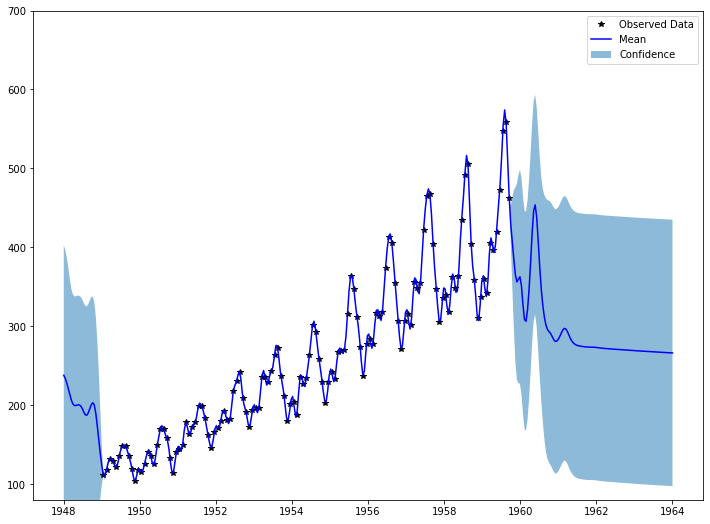

In [21]:
model = GPRegressor(X, y, kernel).double()
train(model, X, y, n_epoch=1000)

for name, p in model.named_hyperparameters():
    print(f"{name}: {p.item():.3f}")
    
plot_model(model, X, y)

В этом случае мы уже наблюдаем тот вид линии регрессии, который и хотели. Однако видно, что значение дисперсии остается постоянным. Это ведет к тому, что вне выборки линия также становится постоянной

__`kernel = k_trend + k_seasonal + k_noise`__

За изменение дисперсии от времени отвечает добавка белого шума $WNK(x, x') = \sigma^2 \textbf{I}[x = x']$. В `gpytorch` нет класса `kernels.WhiteNoise`, поэтому ниже приведена его реализация.

In [22]:
from gpytorch.lazy import DiagLazyTensor, ZeroLazyTensor

class WhiteNoiseKernel(kernels.Kernel): 
    def __init__(self, noise=1):
        super().__init__()
        self.noise = noise
        
    def forward(self, x1, x2, **params):
        if self.training and torch.equal(x1, x2):
            return DiagLazyTensor(torch.ones(x1.shape[0]).to(x1) * self.noise)
        elif x1.size(-2) == x2.size(-2) and torch.equal(x1, x2):
            return DiagLazyTensor(torch.ones(x1.shape[0]).to(x1) * self.noise)
        else:
            return torch.zeros(x1.shape[0], x2.shape[0]).to(x1)

In [23]:
k_trend = (kernels.ScaleKernel(kernels.PolynomialKernel(power=1)) + 
          kernels.ScaleKernel(kernels.RBFKernel()))

k_seasonal = kernels.ScaleKernel(
    kernels.PeriodicKernel() * kernels.LinearKernel() * kernels.RBFKernel()
)

k_noise = kernels.ScaleKernel(WhiteNoiseKernel(noise=0.2)) * kernels.LinearKernel()

Iter 1/1000 - Loss: 7.913
Iter 101/1000 - Loss: 4.458
Iter 201/1000 - Loss: 4.312
Iter 301/1000 - Loss: 4.277
Iter 401/1000 - Loss: 4.164
Iter 501/1000 - Loss: 4.063
Iter 601/1000 - Loss: 4.004
Iter 701/1000 - Loss: 3.986
Iter 801/1000 - Loss: 3.881
Iter 901/1000 - Loss: 4.042
Iter 1000/1000 - Loss: 4.098
likelihood.noise_covar.raw_noise: -4.454
mean.constant: 75.671
kernel.kernels.0.kernels.0.raw_outputscale: -4.295
kernel.kernels.0.kernels.0.base_kernel.raw_offset: -1.191
kernel.kernels.0.kernels.1.raw_outputscale: 37.740
kernel.kernels.0.kernels.1.base_kernel.raw_lengthscale: -0.730
kernel.kernels.1.raw_outputscale: -2.476
kernel.kernels.1.base_kernel.kernels.0.raw_lengthscale: -0.169
kernel.kernels.1.base_kernel.kernels.0.raw_period_length: 0.555
kernel.kernels.1.base_kernel.kernels.1.raw_variance: -2.476
kernel.kernels.1.base_kernel.kernels.2.raw_lengthscale: 8.520
kernel.kernels.2.kernels.0.raw_outputscale: -5.313
kernel.kernels.2.kernels.1.raw_variance: -5.313


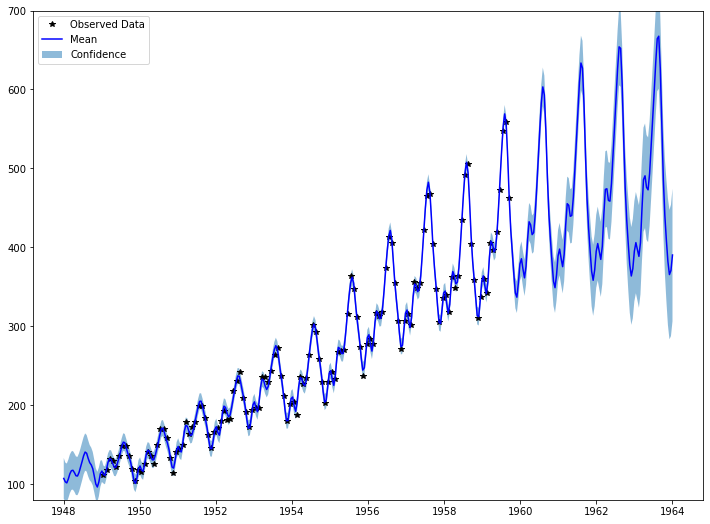

In [24]:
kernel = kernels.AdditiveKernel(k_trend, k_seasonal, k_noise)

model = GPRegressor(X, y, kernel).double()
train(model, X, y, n_epoch=1000, lr=0.1)

for name, p in model.named_hyperparameters():
    print(f"{name}: {p.item():.3f}")
    
plot_model(model, X, y)

### Заключение

Гауссовские процессы нашли широкое применение в машинном обучении. Так, помимо задачи регрессии, с помощью гауссовских процессов можно решать задачи классификации[[15]](https://www.jmlr.org/papers/volume9/nickisch08a/nickisch08a.pdf). Существуют также и другие их интересные применения. Например, с помощью гауссовских процессов можно решать многозадачную регрессию [[16]](https://papers.nips.cc/paper/2007/file/66368270ffd51418ec58bd793f2d9b1b-Paper.pdf) или обучение ядра можно интегрировать в нейронную сеть[[17]](https://arxiv.org/pdf/1511.02222.pdf) и [[18]](https://arxiv.org/pdf/1611.00336.pdf). Столь широкое применение гауссовские процессы получили благодаря своей гибкости и простоте, что в современных задачах является одним из ключевых факторов.

### Используемая литература:

[1] Н.И. Чернова. Лекции по математической статистике https://tvims.nsu.ru/chernova/ms/lec/ms.html

[2] C. E. Rasmussen & C. K. I. Williams, Gaussian Processes for Machine Learning, the MIT Press, 2006, ISBN 026218253X. © 2006 Massachusetts Institute of Technology. http://www.gaussianprocess.org/gpml/chapters/RW.pdf

[3] Лекции по случайным процессам : учебное пособие / А. В. Гасников, Э. А. Горбунов, С. А. Гуз и др. ; под ред.А. В. Гасникова. – Москва : МФТИ, 2019. – 285 с. ISBN 978-5-7417-0710-4 https://arxiv.org/pdf/1907.01060.pdf

[4] Википедия. Байесовский вывод. https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%B2%D1%8B%D0%B2%D0%BE%D0%B4

[5] Gaussian Processes regression: basic introductory example. https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

[6] Википедия. Гауссовский процесс. https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81

[7] More Kernels and Their Properties https://web.iitd.ac.in/~sumeet/CLT2008S-lecture18.pdf

[8] Illustration of prior and posterior Gaussian process for different kernels https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html

[9] 2020_6_seminar_Multivariate_distribution https://vk.com/doc192386009_568671108?hash=e473525acdefb436fa&dl=db23cb9754502e33bc

[10] Gaussian Processes: From the Basics to the State-of-the-Art http://cbl.eng.cam.ac.uk/pub/Public/Turner/News/imperial-gp-tutorial.pdf

[11] GPyTorch. https://gpytorch.ai/

[12] GPyTorch’s documentation https://docs.gpytorch.ai/en/stable/

[13] Summer school on deep learning and bayesian methods https://deepbayes.ru/

[14] PyTorch https://pytorch.org/

[15] Approximations for Binary Gaussian Process Classification https://www.jmlr.org/papers/volume9/nickisch08a/nickisch08a.pdf

[16] Multi-task Gaussian Process Prediction https://papers.nips.cc/paper/2007/file/66368270ffd51418ec58bd793f2d9b1b-Paper.pdf

[17] Stochastic Variational Deep Kernel Learning https://arxiv.org/pdf/1611.00336.pdf

[18] Deep Kernel Learning https://arxiv.org/pdf/1511.02222.pdf